## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número: 

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab2.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2-T51N-data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "data":          dados bi-dimensionais (4000 amostras)
### 2. "target":       classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Classificadores da distância ao centroide:
## 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
## 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
## 3. Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
fN = '/Users/anaso/Documents/AA/AA-22-23/_old/Laboratorios/Lab2/Lab2-T51N-data.p'
D=pickle.load(open(fN,'rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


(-1.8046696221557734,
 1.8077790746777087,
 -2.3031771398911225,
 2.298130061420666)

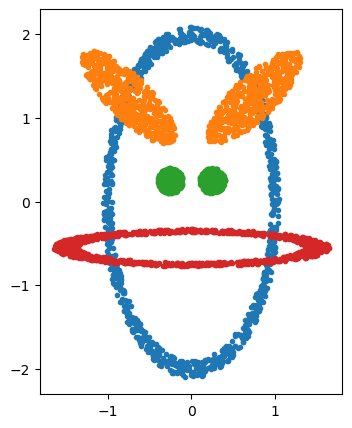

In [13]:
X = D.data
y = D.target 

foldTreino = D.foldTrain
foldTeste = D.foldTest

#print(np.unique(y))

plt.figure(figsize=(5,5))
plt.plot(X[0, y==0], X[1, y==0], '.')
plt.plot(X[0, y==1], X[1, y==1], '.')
plt.plot(X[0, y==2], X[1, y==2], '.')
plt.plot(X[0, y==3], X[1, y==3], '.')
plt.axis('scaled')


In [14]:
X_treino = X[:, foldTreino]
y_treino = y[foldTreino]

X_teste = X[:, foldTeste]
y_teste = y[foldTeste]
#print(X.shape, y.shape)

m0 = np.mean(X_treino[:, y_treino==0], axis=1)
m1 = np.mean(X_treino[:, y_treino==1], axis=1)
m2 = np.mean(X_treino[:, y_treino==2], axis=1)
m3 = np.mean(X_treino[:, y_treino==3], axis=1)

print("Média classe 0: ", m0)
print("Média classe 1: ", m1)
print("Média classe 2: ", m2)
print("Média classe 3: ", m3)

Média classe 0:  [-0.13243819  0.03660923]
Média classe 1:  [-0.77640453  1.25665047]
Média classe 2:  [0.01068383 0.25081224]
Média classe 3:  [-0.0907223  -0.54198523]


Número de erros:  1641
Matrix de confusão: 
 [[ 49 283 151 417]
 [  0 376 524   0]
 [266   0 634   0]
 [  0   0   0 900]]


(-1.8046696221557734,
 1.8077790746777087,
 -2.3031771398911225,
 2.298130061420666)

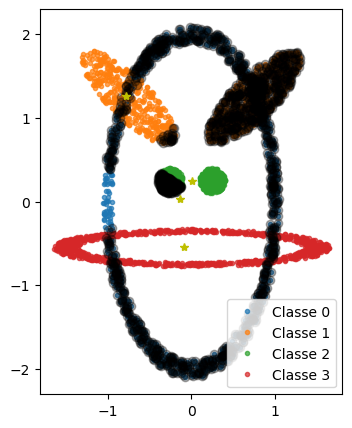

In [53]:
D0 = np.sqrt(np.sum((X_teste-m0[:, np.newaxis])**2, axis=0))
D1 = np.sqrt(np.sum((X_teste-m1[:, np.newaxis])**2, axis=0))
D2 = np.sqrt(np.sum((X_teste-m2[:, np.newaxis])**2, axis=0))
D3 = np.sqrt(np.sum((X_teste-m3[:, np.newaxis])**2, axis=0))

D = np.vstack((D0, D1, D2, D3))

y_teste_estimado = np.argmin(D, axis=0)

print("Número de erros: ", np.sum(y_teste != y_teste_estimado))
print("Matrix de confusão: \n", confusion_matrix(y_teste, y_teste_estimado))

plt.figure(figsize=(5,5))
plt.plot(X_teste[0, y_teste==0], X_teste[1, y_teste==0], '.', alpha=.7)
plt.plot(X_teste[0, y_teste==1], X_teste[1, y_teste==1], '.', alpha=.7)
plt.plot(X_teste[0, y_teste==2], X_teste[1, y_teste==2], '.', alpha=.7)
plt.plot(X_teste[0, y_teste==3], X_teste[1, y_teste==3], '.', alpha=.7)
plt.plot(X_teste[0, y_teste != y_teste_estimado], X_teste[1, y_teste != y_teste_estimado], 'ok', alpha=.3)
plt.plot(m0[0], m0[1], '*y', alpha=1)
plt.plot(m1[0], m1[1], '*y', alpha=1)
plt.plot(m2[0], m2[1], '*y', alpha=1)
plt.plot(m3[0], m3[1], '*y', alpha=1)
plt.legend(["Classe 0", "Classe 1", "Classe 2", "Classe 3"])
plt.axis('scaled')


In [54]:
print("O centroide da classe '1' não é a média da classe. ")

O centroide da classe '1' não é a média da classe. 


### O centroide da classe "1" não é a média da classe

# Pergunta 2 - Classificadores dos k-vizinhos mais próximos:
## (Use os dados de treino nestes classificadores)
## 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
## 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
## 3. Repita as duas alíneas anteriores para k=5

Número de erros:  601
Matrix de confusão: 
 [[837  35   0  28]
 [469 402  29   0]
 [  0   0 900   0]
 [ 40   0   0 860]]


(-1.8046696221557734,
 1.8077790746777087,
 -2.3031771398911225,
 2.298130061420666)

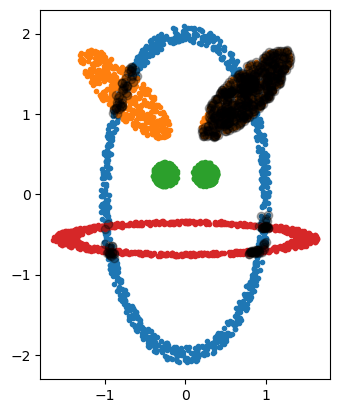

In [65]:
from sklearn.neighbors import KNeighborsClassifier

k = 1

kNN = KNeighborsClassifier(n_neighbors=k).fit(X_treino.T, y_treino)

y_teste_estimado2 = kNN.predict(X_teste.T)

print("Número de erros: ", np.sum(y_teste != y_teste_estimado2))
print("Matrix de confusão: \n", confusion_matrix(y_teste, y_teste_estimado2))

plt.plot(X_teste[0, y_teste==0], X_teste[1, y_teste==0], '.')
plt.plot(X_teste[0, y_teste==1], X_teste[1, y_teste==1], '.')
plt.plot(X_teste[0, y_teste==2], X_teste[1, y_teste==2], '.')
plt.plot(X_teste[0, y_teste==3], X_teste[1, y_teste==3], '.')
plt.plot(X_teste[0, y_teste!=y_teste_estimado2], X_teste[1, y_teste!=y_teste_estimado2], 'ok', alpha=.3)
plt.axis('scaled')

Número de erros:  639
Matrix de confusão: 
 [[784  50   0  66]
 [459 400  41   0]
 [  0   0 900   0]
 [ 23   0   0 877]]


(-1.8046696221557734,
 1.8077790746777087,
 -2.3031771398911225,
 2.298130061420666)

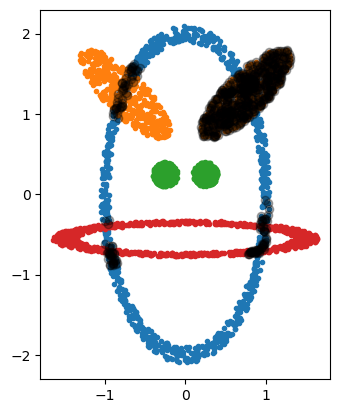

In [64]:
k = 5

kNN = KNeighborsClassifier(n_neighbors=k).fit(X_treino.T, y_treino)

y_teste_estimado3 = kNN.predict(X_teste.T)

print("Número de erros: ", np.sum(y_teste != y_teste_estimado3))
print("Matrix de confusão: \n", confusion_matrix(y_teste, y_teste_estimado3))

plt.plot(X_teste[0, y_teste==0], X_teste[1, y_teste==0], '.')
plt.plot(X_teste[0, y_teste==1], X_teste[1, y_teste==1], '.')
plt.plot(X_teste[0, y_teste==2], X_teste[1, y_teste==2], '.')
plt.plot(X_teste[0, y_teste==3], X_teste[1, y_teste==3], '.')
plt.plot(X_teste[0, y_teste!=y_teste_estimado3], X_teste[1, y_teste!=y_teste_estimado3], 'ok', alpha=.3)
plt.axis('scaled')

# Pergunta 3 - Matrizes de distância:
## Considere os dados "digits" do sklearn ()
## 1. Ordene os dados por classe, calcule e visualize a matriz de distâncias para o conjunto de dados, usando a distância euclideana
## 2. Repita a alínea anterior para a distância de cosseno

In [68]:
import sklearn.datasets as dt
D=dt.load_digits()
X=D.data
y=D.target

Text(0.5, 1.0, 'Cosseno')

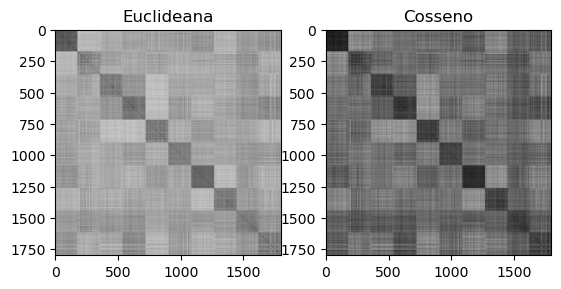

In [79]:
import scipy.spatial.distance as spd

# Ordenar os dados
idx = np.argsort(y)
X = X[idx, :]
y = y[idx]

euc = spd.squareform(spd.pdist(X, metric='euclidean'))
cos = spd.squareform(spd.pdist(X, metric='cosine'))

plt.subplot(121)
plt.imshow(euc, cmap='gray')
plt.title("Euclideana")

plt.subplot(122)
plt.imshow(cos, cmap='gray')
plt.title("Cosseno")